# CME 241 Assignment 2
## Shaan Patel


### Question 1

The state space for the Snakes and Ladders game is all numbers from
0 to 100. However, with the addition of the snakes and ladders, we remove
certain numbers and replace them with their destination tile (i.e. the 1
tile has a ladder to 38, so 1 is removed).

In terms of transition probabilities, the distributions all follow the 
distribution of a 6 sided dice roll. However, the snakes and ladders lead to
different results for each space. For example, the distribution at state 0 is:

```math
38, 1/6
2, 1/6
3, 1/6
14, 1/6
5, 1/6
6, 1/6
```

More generally, let us assume a ladder going to $s'$ is denoted as $l$ and a snake going to $s'$ is $n$. Then, given we are on space $s$, the probability of landing on $s'$ is:


$$1/6,  l||n||s' - s \le 6, s < l||n||s'$$
$$1/3,  (l,s') || (n,s) - s \le 6, s < (l,s') || (n,s') $$
$$1/2, (l,n,s') - s \le 6, s < l,n,s' $$

These distributions show that if $s$ and $s'$ are within six spaces of each other, then the probability of achieving $s'$ is 1/6. This probability doubles if a ladder or snake are also within six spaces of $s$, and triples if all three are within one dice roll of $s$. If all three spaces are below $s$ or greater than 6 away from $s$, the probability is 0.

In the current implementation of the game, however, there is no space that has both a ladder and snake pointing to it, so the third line is irrelevant. In addition, there are only two occasions in which the probablility is 1/3; going to space 53 (snake at space 56) and going to space 60 (snake at space 64). Aside from these edge cases, the probability of landing on $s'$ given that we are on $s$ is 1/6 if $s$ is within 6 spaces of $s'$, its corresponding ladder, or its corresponding snake.


### Question 2

In [3]:
import itertools
import matplotlib.pyplot as plt
from rl.distribution import Categorical
from rl.markov_process import (FiniteMarkovProcess, MarkovProcess,
                                MarkovRewardProcess, NonTerminal, State)


In [18]:
class SnakesAndLadders(FiniteMarkovProcess[int]):
    def __init__(self, p):
        irregulars = {1,4,9,16,21,28,36,47,49,51,56,62,64,71,80,87,93,95,98}
        change = {1:38, 4:14, 9:31, 16:6,
                21:42, 28:84, 36:44, 47:26, 
                49:11, 51:67, 56:53, 62:19,
                64:60, 71:91, 80:100, 87:24,
                93:73, 95:75, 98:78}
        regulars = set(range(0,106))
        regulars = regulars.difference(irregulars)
        transition_map = {
            b : Categorical({(b+x if b+x in regulars else change[b+x]): (1/p)
                for x in range(1,p)}
            ) for b in range(0,100)
        }
        super().__init__(transition_map)

In [19]:
simulation = SnakesAndLadders(6)
startstate = simulation.transition(NonTerminal(0))
tracer = simulation.traces(startstate)
runcounter = itertools.islice(tracer, 10000)
rundata = []
for run in runcounter:
    count = sum(1 for i in run)
    rundata.append(count)



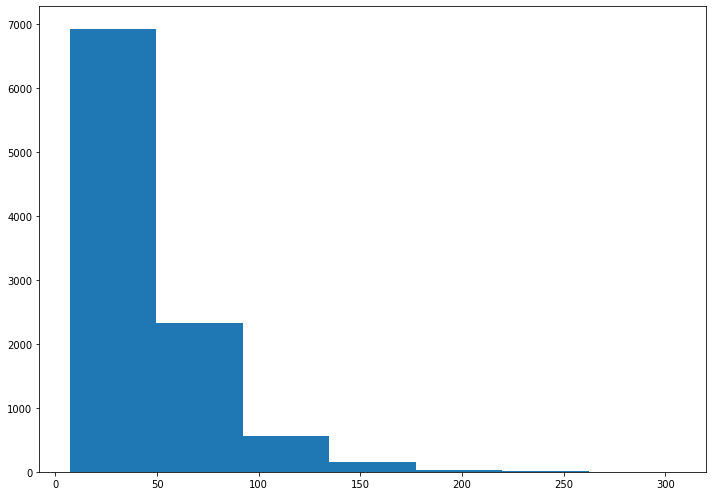

In [20]:
fig, ax = plt.subplots(1,1, figsize = (10,7), tight_layout = True)
ax.hist(rundata, bins = 7)
plt.show()